In [6]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('insurance_dataset.csv')
X = df.drop('charges', axis=1)

X.family_medical_history = X.family_medical_history.replace(np.nan, 'No history')
X.medical_history = X.medical_history.replace(np.nan, 'No history')
y = df['charges']

# Split data into train and test.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.30, random_state = 20)
X_train['charges'] = y_train
training = X_train.copy()

formula = 'charges ~ age + C(gender) + bmi + children + C(smoker) + C(region) + C(medical_history) + C(family_medical_history) + C(exercise_frequency) + C(occupation) + C(coverage_level)'
model = smf.ols(formula = formula, data = training).fit()

## Figure 2:

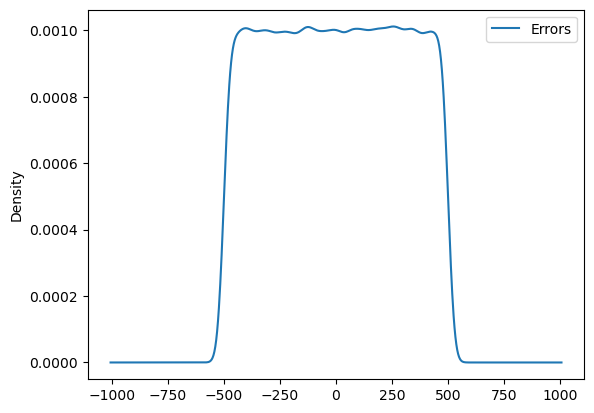

In [7]:
X_test['predictions'] = model.predict(X_test)
X_test['True Y'] = y_test
X_test['error'] = X_test['True Y'] - X_test.predictions
X_test.error.plot.density(label = 'Errors')

plt.legend()
plt.show()

## Figure 3:

Text(0.5, 1.0, 'Residual plot')

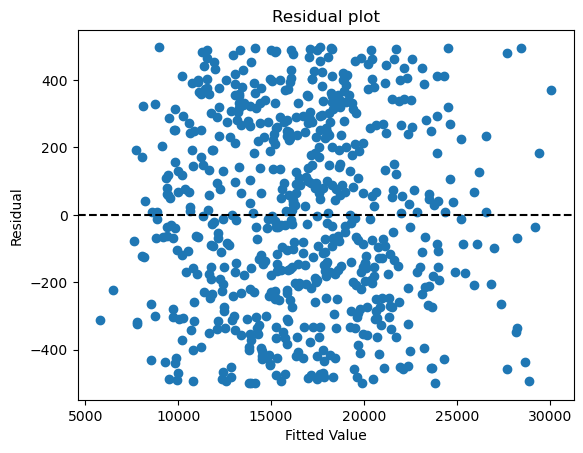

In [8]:
plt.scatter(X_test.predictions[:650], X_test.error[:650])
plt.axhline(0, 0,1, color = 'black', linestyle = '--')

plt.xlabel('Fitted Value')
plt.ylabel('Residual')
plt.title('Residual plot')